In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tabla Global

In [20]:
###Cambiar todos los diagnosticos de International por los diagnosticos de Noux International
df = pd.read_csv()
df = df.replace(to_replace= 'HCN', value= 'NOS' )
df = df.replace(to_replace= 'HCN NOS', value= 'NOS' )
df = df.replace(to_replace= 'HCN NOS || Other', value= 'NOS || Other' )
df = df.replace(to_replace= 'Rhabdo', value= 'Other' )
df = df.replace(to_replace= 'Ad', value= 'Other' )
df = df.replace(to_replace= 'Not possible', value= 'Other' )
df['International'] = np.where(df['Nous DX International Jun 22'] != "NaN", df['Nous DX International Jun 22'], df['International'])
df.replace("NaN", np.nan, inplace=True)
df1 = pd.read_csv('Nueva_global_05102022_AlvaroDavide_v2.csv', sep="\t", decimal=',')
df_global = pd.concat([df,df1], axis=1)

In [21]:
### Replacement of all diagnosis of  International by Noux International
df = pd.read_csv("Local-nat-inter_070622_for BSC1_actualizada.csv", sep=',')
df = df.fillna("NaN")
df = df.replace(to_replace= 'HCN', value= 'NOS' )
df = df.replace(to_replace= 'HCN NOS', value= 'NOS' )
df = df.replace(to_replace= 'HCN NOS || Other', value= 'NOS || Other' )
df = df.replace(to_replace= 'Rhabdo', value= 'Other' )
df = df.replace(to_replace= 'Ad', value= 'Other' )
df = df.replace(to_replace= 'Not possible', value= 'Other' )

df['International'] = np.where(df['Nous DX International Jun 22'] != "NaN", df['Nous DX International Jun 22'], df['International'])


df = df.replace(to_replace= 'HB || Other', value= 'DOUBT' )
df = df.replace(to_replace= 'HB || HCC', value= 'DOUBT' )
df = df.replace(to_replace= 'HCC || Other', value= 'DOUBT' )
df = df.replace(to_replace= 'HB || HCC', value= 'DOUBT' )
df = df.replace(to_replace= 'HB || Not possible', value= 'HB' )
df = df.replace(to_replace= 'HB || HCN NOS', value= 'DOUBT' )
df = df.replace(to_replace= 'NOS || Other', value= 'DOUBT' )
df = df.replace(to_replace= 'HCC- DOUBT', value= 'DOUBT' )
df = df.replace(to_replace= 'HB- DOUBT', value= 'DOUBT' )
df = df.replace(to_replace= 'HB || HCC/A- DOUBT', value= 'DOUBT' )
df = df.replace(to_replace= 'NOS || Not possible', value= 'NOS' )
df = df.replace(to_replace= 'DOUBT || NOS- DOUBT', value= 'DOUBT' )
df = df.replace(to_replace= 'HB/HCC- DOUBT', value= 'DOUBT' )
df = df.replace(to_replace= 'HB || NOS', value= 'DOUBT' )
df1 = pd.read_csv('Nueva_global_05102022_AlvaroDavide_v2.csv', sep="\t", decimal=',')
df_global = pd.concat([df,df1], axis=1)


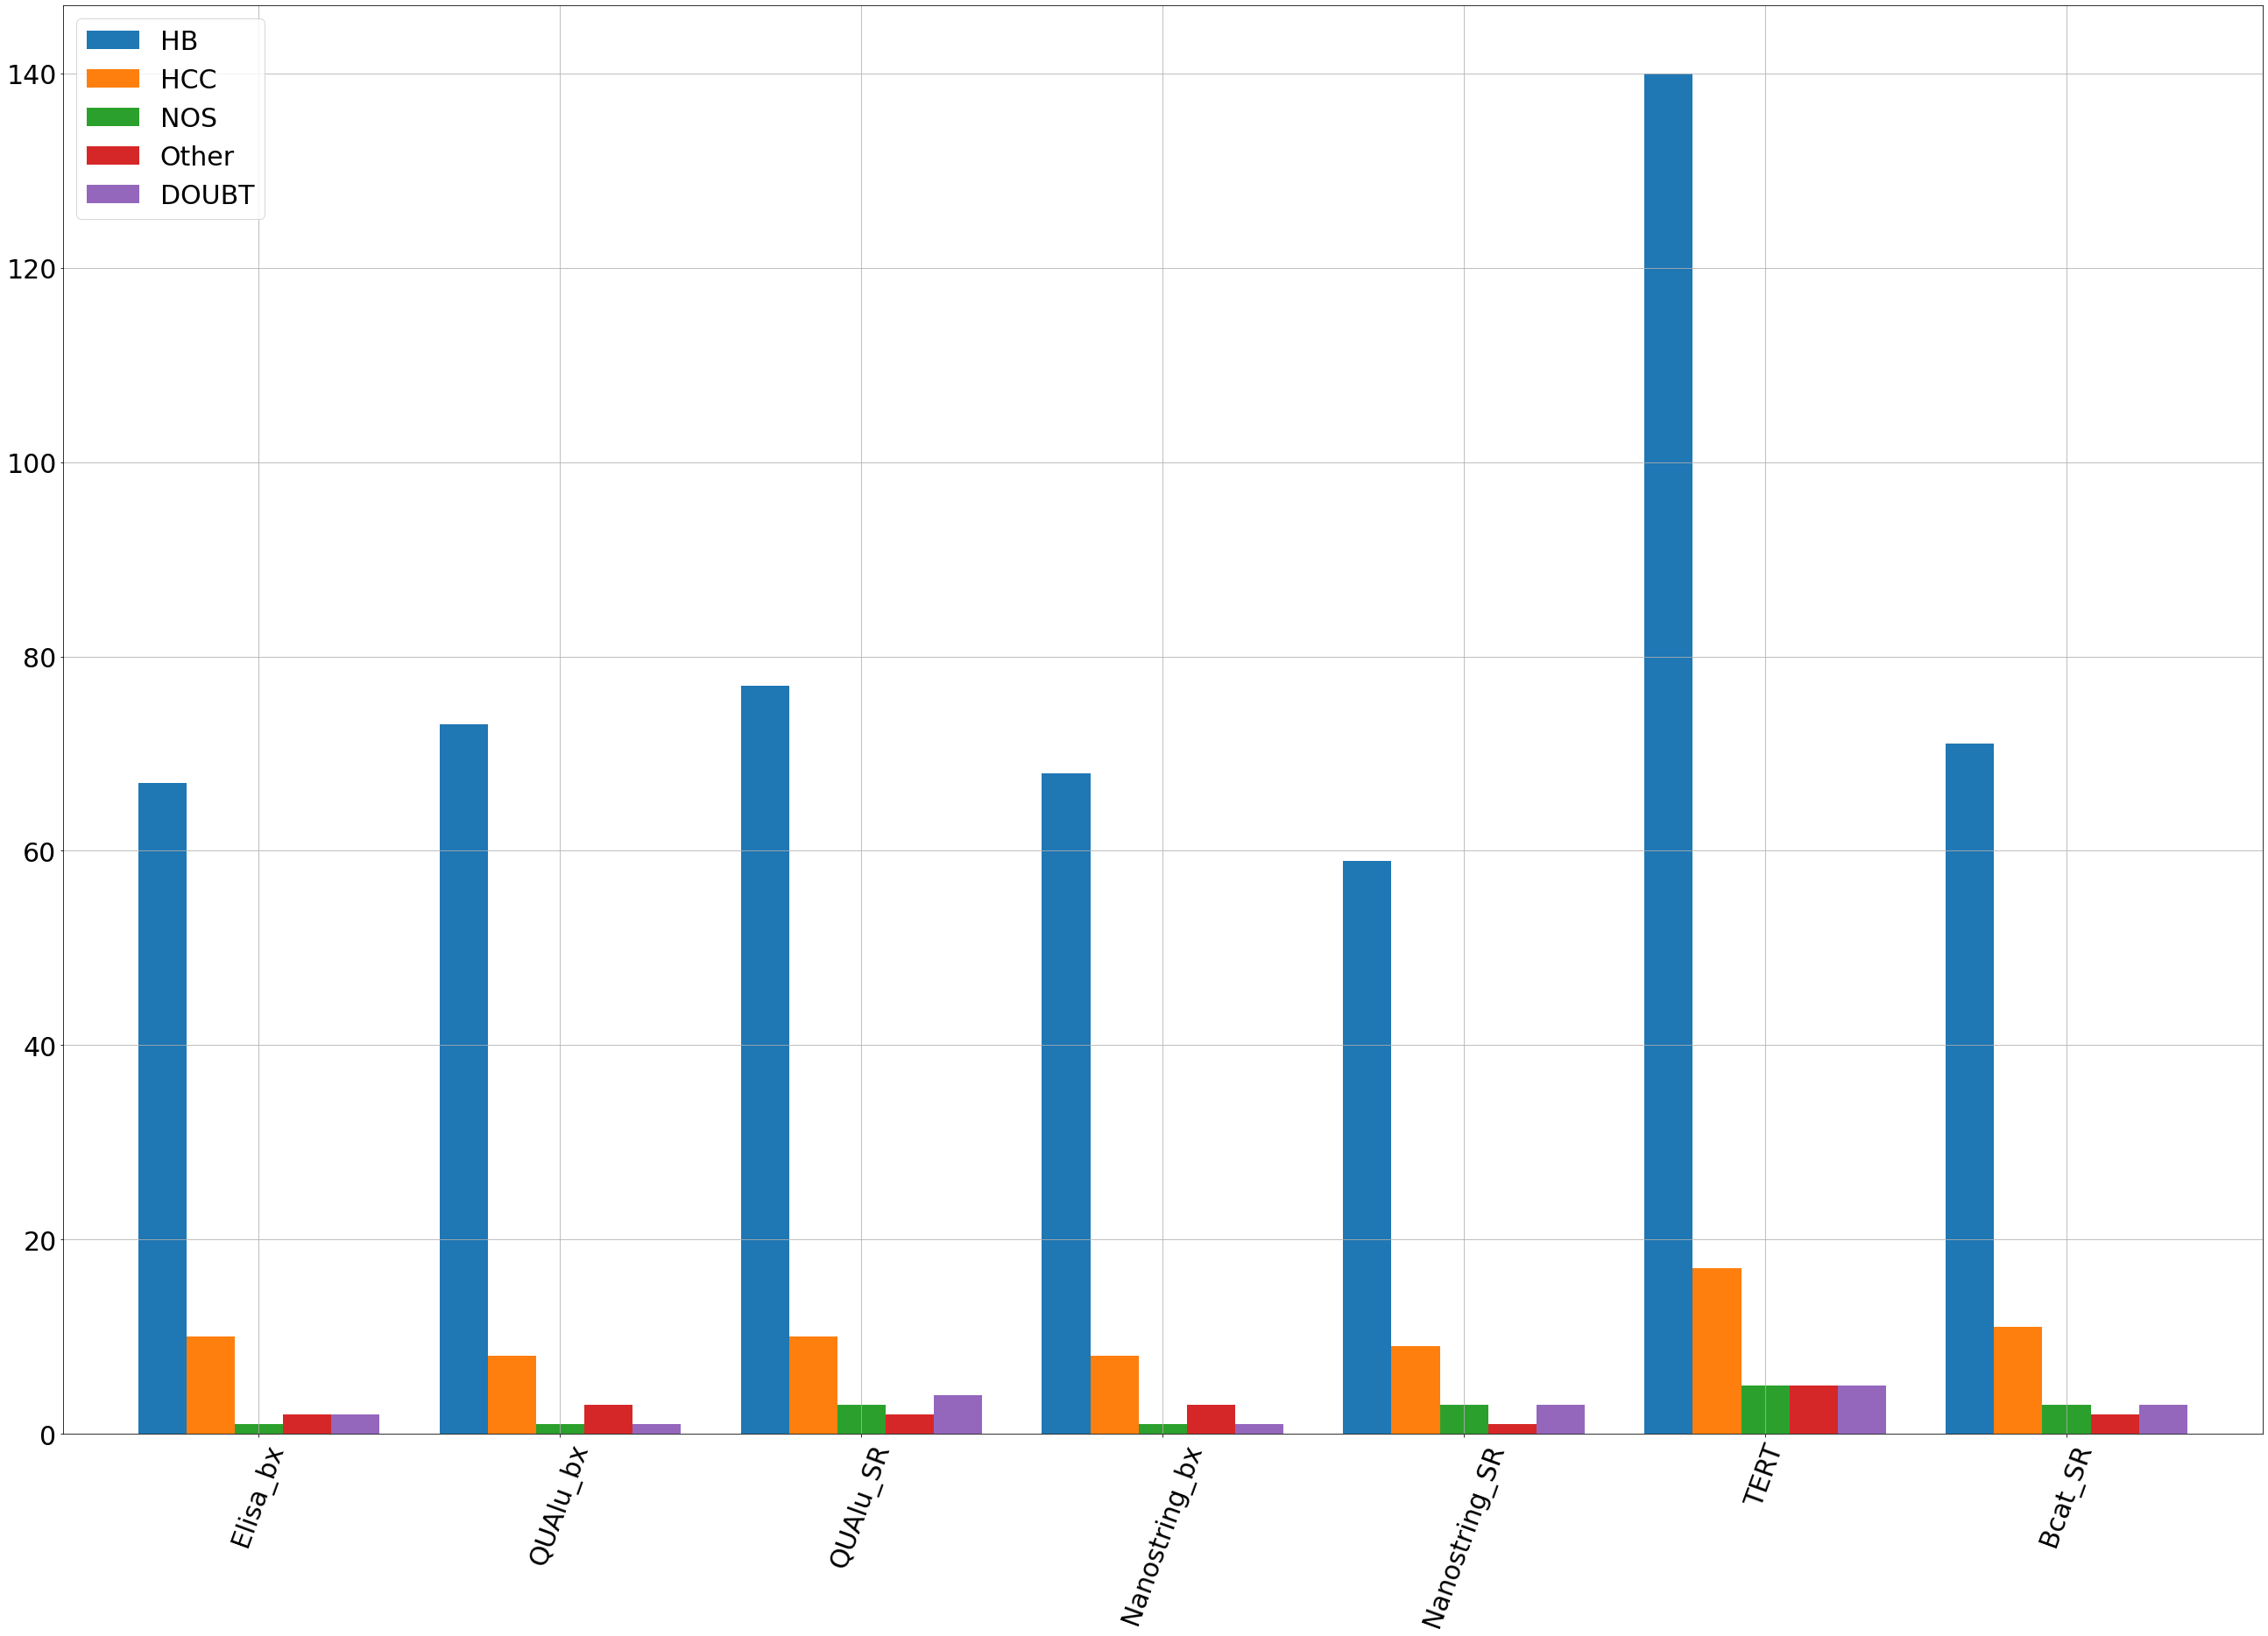

In [19]:
df_counts = pd.DataFrame()
def counts_nano (diagnostico, rangoI, rangoF):
    df_counts = df_global.loc[(df_global['International'] == diagnostico)]
    df_counts = df_counts.loc[:, rangoI : rangoF]
    df_counts = df_counts.dropna()
    return (df_counts.shape[0])
def counts_gene_muatations (diagnostico, variable):
    df_counts = df_global.loc[(df_global['International'] == diagnostico)]
    df_counts = df_counts.loc[:, variable]
    df_counts = df_counts.dropna()
    return (df_counts.shape[0])

def counts_met(diagnostico, variable):
    df_counts = df_global.loc[(df_global['International'] == diagnostico)]
    df_counts = df_counts.loc[:, variable]
    df_counts = df_counts.dropna()
    return (df_counts.shape[0])
def counts_elisa(diagnostico):
    df_counts = df_global.loc[(df_global['International'] == diagnostico)]
    df_counts = df_counts.loc[:, "C1QBP_ELISA_bx" : "SPINK1_ELISA_bx"]
    df_counts = df_counts.drop(["C1QBP_ELISA_EOT", "DLK1_ELISA_EOT"], axis=1)
    df_counts = df_counts.dropna()
    return (df_counts.shape[0])

for i in ["HB", "HCC", "NOS", "Other", "DOUBT"]: 

    df_counts.at[i, "Elisa_bx"] = counts_elisa(i)
    df_counts.at[i, "QUAlu_bx"] = counts_met(i, "qualu _bx")
    df_counts.at[i, "QUAlu_SR"] = counts_met(i, "qualu_SR")
    df_counts.at[i, "Nanostring_bx"] = counts_nano(i, "ACAN_bx", "TBP_bx")
    df_counts.at[i, "Nanostring_SR"] = counts_nano(i, "ACAN_SR", "TBP_SR")
    df_counts.at[i, "TERT"] = counts_gene_muatations(i, "TERT_SR")
    df_counts.at[i, "Bcat_SR"] = counts_gene_muatations(i, "Bcat_SR")







df_counts.T.plot.bar(width=.8, fontsize=30,figsize=(45,30), grid=True)
plt.xticks(rotation=70)
plt.legend(loc=2, prop={'size': 30})
#plt.xticks(np.arange(0, 30, step=4))
plt.savefig('Count_histogram.jpg')
#plt.tight_layout()